In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Gradients

Formally, an image gradient is defined as a ***directional change in image intensity***.



### Sobel Kernels

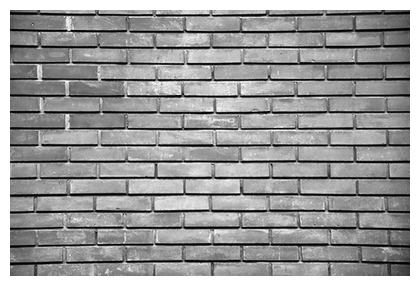

In [2]:
image = cv2.imread("images/bricks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(gray, flip=False, cmap="gray")

In [4]:
# compute gradients along x and y axis
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

In [5]:
# the `gX` and `gY` images are now of the floating point data type,
# so we need to take care to convert them back to an unsigned 8-bit
# integer representation so other OpenCV functions can utilize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

In [ ]:
sobel_combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
display(sobel_combined, flip=False, cmap="gray")
display(gX, flip=False, cmap="gray")